# PreProcessing

Melakukan klasifikasi keluhan pada data tweet @PosIndonesia, pertama mengambil data tweet menggunakan AmbilDataTwitter/exporter.py, data yang diambil adalah sebagai berikut :

## Data Awal

In [1]:
import pandas as pd

df = pd.read_csv('Data/Dataset.csv', skiprows=[0], names=['ID','label','tweet'])
df.head()

,ID,label,tweet
0,1,terlambat,#PosIndonesia kau sungguh sangat lemot sekali....
1,2,terlambat,@BukaBantuan @bukalapak @PosIndonesia min resi...
2,3,terlambat,@fauzannur14 saya blm pernah pake next day sam...
3,4,terlambat,@PosIndonesia
4,5,terlambat,@PosIndonesia


## Preprocessing text tweet

Kemudian masuk proses preprocessing, yaitu menghapus element yang tidak diperlukan pada data tweet, pertama yaitu menghapus stoword menggunakan library stopword sastrawi 

In [3]:
import re
import sys
from utils import write_status
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocess_word(word):
    # Menghapus tanda baca
    word = word.strip('\'"?!,.():;')
    # Menghapus repetisi seperti apaaa --> apa
    word = re.sub(r'(.)\1\1+', r'\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word

def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

#  Convert emoji 
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))','senyum', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)','tawa', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)','cinta', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)','kedip', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)','sedih', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()','tangis', tweet)
    return tweet

def preprocess_tweet(tweet):
    processed_tweet = []
    # Convert menjadi lower case
    tweet = tweet.lower()
    # Menghapus URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+)|(pic.twitter.com[\S]+))','', tweet)
    # Menghapus @blabla usermention
    tweet = re.sub(r'@[\S]+', '', tweet)
    # Menghapus #hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Menghapus RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Mengganti 2+ dots dengan spasi
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Mengganti resi 13 atau 15 angka dan huruf
    #tweet = re.sub(r'(\b\w{15}\b)|(\b\w{13}\b)|(\b\w{11}\b)|(\b\w{12}\b)','resi', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Mengganti emoji 
    tweet = handle_emojis(tweet)
    # Menghapus SAMPE2 -- sampe
    tweet = re.sub(r'(\S+)2', r'\1', tweet)
    # Menghapus multiple spasi dengan single spasi
    tweet = re.sub(r'(\b\w{1}\b)','', tweet)
    # Menghapus 1 character
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    words = tweet.split()

    for word in words:
        word = preprocess_word(word)
        if is_valid_word(word):
            if use_stopword:
                word = stopword.remove(word)
            processed_tweet.append(word)

    return ' '.join(processed_tweet)

def preprocess_csv(Dataset, Hasil, test_file=False):
    save_to_file = open('Data/CleanDatasetStopword.csv', 'w')

    with open('Data/Dataset.csv', 'r') as csv:
        lines = csv.readlines()
        total = len(lines)
        for i, line in enumerate(lines):
            tweet_id = line[:line.find(',')]
            if not test_file:
                line = line[1 + line.find(','):]
                kategori = str(line[:line.find(',')])
            line = line[1 + line.find(','):]
            tweet = line
            processed_tweet = preprocess_tweet(tweet)
            if not test_file:
                save_to_file.write('%s,%s,%s\n' %
                                   (tweet_id, kategori, processed_tweet))
            else:
                save_to_file.write('%s,%s\n' %
                                   (tweet_id, processed_tweet))
            write_status(i + 1, total)
    save_to_file.close()
    print '\nSaved processed tweets to: %s' % Hasil
    return Hasil

if __name__ == '__main__':
    use_stopword = True
    Dataset = sys.argv[1]
    if use_stopword:
        factory = StopWordRemoverFactory()
        #stopwords = factory.get_stop_words()
        stopword = factory.create_stop_word_remover()
        #print(stopwords)
        Hasil = sys.argv[1][:-4] + 'CleanDataset untuk Hasil_stopword'
    Hasil = sys.argv[1][:-4] + 'CleanDataset untuk Hasil_stopword'
    preprocess_csv(Dataset, Hasil, test_file=False)

Processing 2221/2221
Saved processed tweets to: CleanDataset untuk Hasil_stopword


Kemudian proses stemming yaitu mengubah kata menjadi kata dasar menggunakan stemmer menggunakan library stemmer sastrawi 

In [13]:
import re
import sys
from utils import write_status
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import re
import sys
from utils import write_status
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocess_word(word):
    # Menghapus tanda baca
    word = word.strip('\'"?!,.():;')
    # Menghapus repetisi seperti apaaa --> apa
    word = re.sub(r'(.)\1\1+', r'\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word

def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

#  Convert emoji 
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))','senyum', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)','tawa', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)','cinta', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)','kedip', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)','sedih', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()','tangis', tweet)
    return tweet

def preprocess_tweet(tweet):
    processed_tweet = []
    # Convert menjadi lower case
    tweet = tweet.lower()
    # Menghapus URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+)|(pic.twitter.com[\S]+))','', tweet)
    # Menghapus @blabla usermention
    tweet = re.sub(r'@[\S]+', '', tweet)
    # Menghapus #hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Menghapus RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Mengganti 2+ dots dengan spasi
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Mengganti resi 13 atau 15 angka dan huruf
    #tweet = re.sub(r'(\b\w{15}\b)|(\b\w{13}\b)|(\b\w{11}\b)|(\b\w{12}\b)','resi', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Mengganti emoji 
    tweet = handle_emojis(tweet)
    # Menghapus SAMPE2 -- sampe
    tweet = re.sub(r'(\S+)2', r'\1', tweet)
    # Menghapus multiple spasi dengan single spasi
    tweet = re.sub(r'(\b\w{1}\b)','', tweet)
    # Menghapus 1 character
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    words = tweet.split()

    for word in words:
        word = preprocess_word(word)
        if is_valid_word(word):
            if use_stemmer:
                word = str(stemmer.stem(word))
            processed_tweet.append(word)

    return ' '.join(processed_tweet)

def preprocess_csv(Dataset, Hasil, test_file=False):
    save_to_file = open('Data/CleanDatasetStopwordStemmer.csv', 'w')

    with open('Data/CleanDatasetStopword.csv', 'r') as csv:
        lines = csv.readlines()
        total = len(lines)
        for i, line in enumerate(lines):
            tweet_id = line[:line.find(',')]
            if not test_file:
                line = line[1 + line.find(','):]
                kategori = str(line[:line.find(',')])
            line = line[1 + line.find(','):]
            tweet = line
            processed_tweet = preprocess_tweet(tweet)
            if not test_file:
                save_to_file.write('%s,%s,%s\n' %
                                   (tweet_id, kategori, processed_tweet))
            else:
                save_to_file.write('%s,%s\n' %
                                   (tweet_id, processed_tweet))
            write_status(i + 1, total)
    save_to_file.close()
    print '\nSaved processed tweets to: %s' % Hasil
    return Hasil

if __name__ == '__main__':
    use_stemmer = True
    Dataset = sys.argv[1]
    if use_stemmer:
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()         
        Hasil = sys.argv[1][:-4] + 'CleanDataset untuk Hasil_stemmer'
    Hasil = sys.argv[1][:-4] + 'CleanDataset untuk Hasil_stemmer'
    preprocess_csv(Dataset, Hasil, test_file=False)

Processing 2221/2221
Saved processed tweets to: CleanDataset untuk Hasil_stemmer


## Data tweet yang sudah bersih

Menampilkan data yang sudah bersih yaitu Data/CleanDatasetStopwordStemmer.csv

In [3]:
df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',skiprows=[0], sep=',',names=['id','label','tweet',],encoding="ISO-8859-1")
df.head()

,id,label,tweet
0,1,terlambat,posindonesia kau sungguh sangat lot sekali cum...
1,2,terlambat,min resi sampai kapan yah koo lama bgt ga sampaj
2,3,terlambat,blm pernah pake next day telat minggu koq pali...
3,4,terlambat,barang ambil aja gak takut lama klu anter gpp ...
4,5,terlambat,paket no blm jg padahal pake pos express udah ...


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',skiprows=[0], sep=',',names=['id','label','tweet',],encoding="ISO-8859-1")
df.head()
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
df.shape

(2220, 3)

In [8]:
print("Total data: {}".format(df.shape[0]))
print("Kategori Keluhan karena Terlambat: {}".format(df[df.label == 'terlambat'].shape[0]))
print("Kategori Keluhan karena Kesalahan sistem: {}".format(df[df.label == 'sistem'].shape[0]))
print("Kategori Keluhan karena Gagal kirim: {}".format(df[df.label == 'gagal'].shape[0]))
print("Kategori Keluhan karena Barang rusak: {}".format(df[df.label == 'jaminan'].shape[0]))
print("Kategori Keluhan karena Pelayanan petugas: {}".format(df[df.label == 'pelayanan'].shape[0]))
print("Kategori Keluhan karena Respon terhadap keluhan: {}".format(df[df.label == 'respon'].shape[0]))

Total data: 2220
Kategori Keluhan karena Terlambat: 370
Kategori Keluhan karena Kesalahan sistem: 370
Kategori Keluhan karena Gagal kirim: 370
Kategori Keluhan karena Barang rusak: 370
Kategori Keluhan karena Pelayanan petugas: 370
Kategori Keluhan karena Respon terhadap keluhan: 370


## TF IDF

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
df_y=df["label"]
vectorizer = CountVectorizer()
# tokenize and build vocab
a=vectorizer.fit(df_y)
Fitur= len(vectorizer.vocabulary_)
print(vectorizer.vocabulary_)
print '\nJumlah fitur y(label): %s' % Fitur 

{u'jaminan': 1, u'respon': 3, u'gagal': 0, u'terlambat': 5, u'pelayanan': 2, u'sistem': 4}

Jumlah fitur y(label): 6


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
df_x=df["tweet"]
vectorizer = CountVectorizer()
# tokenize and build vocab
a=vectorizer.fit(df_x)
Fitur= len(vectorizer.vocabulary_)
print(vectorizer.vocabulary_)
print '\nJumlah fitur x(tweet): %s' % Fitur

{u'nmer': 2471, u'tlfn': 3628, u'bngt': 429, u'tubagus': 3708, u'brusaha': 485, u'hati': 1328, u'tiba': 3601, u'banyuwangi': 258, u'lebur': 1984, u'putus': 2882, u'integrity': 1448, u'blm': 417, u'rr043908597id': 3024, u'dalem': 710, u'tasikmalaya': 3505, u'pasang': 2642, u'gadatang': 1172, u'mnggu': 2298, u'tweet': 3732, u'bgitu': 371, u'es17308730kr': 1101, u'nominal': 2480, u'berani': 337, u'kalimantan': 1619, u'cilacap': 597, u'sukoharjo': 3415, u'teweh': 3581, u'coba': 630, u'merchant': 2241, u'manis': 2143, u'jempol': 1539, u'dagang': 703, u'eg15465791kr': 1021, u'deli': 752, u'dollar': 936, u'rem': 2941, u'siapa': 3256, u'belitbelit': 317, u'sermh': 3225, u'klobisasusahngapaiandipermudah': 1790, u'postingan': 2816, u'bengkulu': 328, u'kudu': 1901, u'makasihsenyum': 2104, u'senin': 3207, u'kemaren': 1705, u'manokwari': 2145, u'direspond': 861, u'bla': 410, u'murni': 2351, u'upload': 3792, u'cma': 627, u'upa': 3789, u'hr': 1378, u'trakcing': 3670, u'ru2495095nl': 3042, u'geus': 12

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=3)

cv=CountVectorizer()
print(cv)
print '\n'
x_traincv=cv.fit_transform(x_train)

z=x_traincv.toarray()

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_
cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 
print(x_traincv1)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


  (0, 1992)	0.16641741071
  (0, 2598)	0.465364593651
  (0, 830)	0.256475244781
  (0, 1604)	0.179598346991
  (0, 3326)	0.291050304989
  (0, 674)	0.267367551064
  (0, 1421)	0.255576847635
  (0, 90)	0.271878544735
  (0, 1440)	0.189058152859
  (0, 2468)	0.128729391085
  (0, 2822)	0.305604844718
  (0, 1700)	0.465364593651
  (1, 1992)	0.190874206614
  (1, 830)	0.294166990428
  (1, 508)	0.421480470195
  (1, 3387)	0.241667297391
  (1, 1599)	0.395689561813
  (1, 1022)	0.207148738321
  (1, 2064)	0.430692377626
  (1, 3428)	0.505971537092
  (2, 1445)	0.265515550379
  (2, 1734)	0.601694948276
  (2, 1664)	0.304357454275
  (2,

In [27]:
x_traincv1.todense()

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

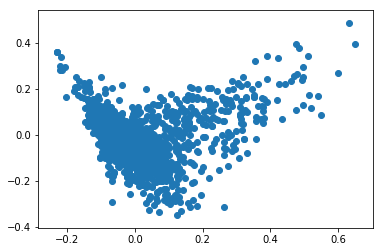

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(x_train).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])

plt.show()          

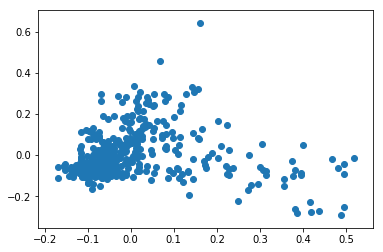

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(x_test).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
# plt.scatter(data2D[:,0], data2D[:,1],c=df.label)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show() 

## Contoh data baris 1

In [41]:
print('Sample 0: ')
print(x_traincv1[0])
print()

Sample 0: 
  (0, 1992)	0.16641741071
  (0, 2598)	0.465364593651
  (0, 830)	0.256475244781
  (0, 1604)	0.179598346991
  (0, 3326)	0.291050304989
  (0, 674)	0.267367551064
  (0, 1421)	0.255576847635
  (0, 90)	0.271878544735
  (0, 1440)	0.189058152859
  (0, 2468)	0.128729391085
  (0, 2822)	0.305604844718
  (0, 1700)	0.465364593651
()


In [30]:
v0 = vectorizer.transform([x_train[0]]).toarray()[0]
print('Sample 0 (vectorized): ')
print(v0)
print()

Sample 0 (vectorized): 
[ 0.  0.  0. ...,  0.  0.  0.]
()


In [39]:
print('Whats the length Sample 0 (vectorized) length: ')
print(len(v0))
print()


Whats the length Sample 0 (vectorized) length: 
3921
()


In [38]:
print('How many words does it have? Sample 0 (vectorized) sum: ')
print(np.sum(v0))
print()

How many words does it have? Sample 0 (vectorized) sum: 
3.3180214204
()


In [40]:
print('To the source:')
print(vectorizer.inverse_transform(v0))
print()

To the source:
[array([u'cuma', u'dri', u'gk', u'hari', u'kau', u'lot', u'paket',
       u'posindonesia', u'sangat', u'sekali', u'sungguh', u'surabaya'],
      dtype='<U54')]
()
